In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from array import array
import matplotlib as mpl

mpl.rcParams.update({'font.size': 16})

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

In [3]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005       # cavity dissipation rate
gamma = 0.05        # atom dissipation rate
N = 2              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation

tlist = np.linspace(0,25,101)

In [4]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian

Hrwa = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())

Horig = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [5]:
Hrwa

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.        ]
 [ 0.          6.28318531  0.31415927  0.        ]
 [ 0.          0.31415927  6.28318531  0.        ]
 [ 0.          0.          0.         12.56637061]]

In [6]:
Horig

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.31415927]
 [ 0.          6.28318531  0.31415927  0.        ]
 [ 0.          0.31415927  6.28318531  0.        ]
 [ 0.31415927  0.          0.         12.56637061]]

In [7]:
A=Horig.full()
A

array([[ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.31415927+0.j],
       [ 0.        +0.j,  6.28318531+0.j,  0.31415927+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.31415927+0.j,  6.28318531+0.j,
         0.        +0.j],
       [ 0.31415927+0.j,  0.        +0.j,  0.        +0.j,
        12.56637061+0.j]])

In [8]:
x,V=linalg.eigh(A)
print(x)
print()
print(V)

[-7.84907902e-03  5.96902604e+00  6.59734457e+00  1.25742197e+01]

[[-0.99968804-0.j -0.        -0.j  0.        +0.j -0.0249766 +0.j]
 [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j -0.70710678+0.j -0.70710678+0.j  0.        +0.j]
 [ 0.0249766 +0.j  0.        +0.j  0.        +0.j -0.99968804+0.j]]


In [9]:
Horig.eigenstates()

(array([-7.84907902e-03,  5.96902604e+00,  6.59734457e+00,  1.25742197e+01]),
 array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.99968804]
  [ 0.        ]
  [ 0.        ]
  [-0.0249766 ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.        ]
  [-0.70710678]
  [ 0.70710678]
  [ 0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.        ]
  [-0.70710678]
  [-0.70710678]
  [ 0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[-0.0249766 ]
  [ 0.        ]
  [ 0.        ]
  [-0.99968804]]], dtype=object))

In [10]:
psi0

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [11]:
#I have written this code to evolve for given eigenvalues and eigenvectors
#I could easily modify it so that I could just give it H and it calcs them in the function

def evolve(psi,t,E,V):
    
    
    
    #insert code here to do for H instead...
    
    
    
    
    
    
    h=1#to simplify things
    
    #I am going to write this so psi is NOT a Qobj
    #psi has to be of the form [[],[],...]
    psit=0
    
    for i in range(len(V)):
        v=np.array([V[i]])
        v=v.T
        
        #print(psi)
        #print(v)
        
        #cn=np.dot(psi,v)
        cn=sum(psi*v) #the dot product should work but it doesnt for some reason....
        en=E[i]
        
        psit+=cn*np.exp(1j*t*en/h)*v
        
    return psit
        
    

In [12]:
psi0=np.array([[0],[0],[1],[0]]) #need a way to define initial state in terms of n
psi0

array([[0],
       [0],
       [1],
       [0]])

In [13]:
np.conj(evolve(psi0,1,x,V))
#evolve(psi0,1,x,V)

array([[0.        -0.00000000e+00j],
       [0.        -3.09016994e-01j],
       [0.95105652+2.22044605e-16j],
       [0.        -0.00000000e+00j]])

Ok, so now that we can time evolve stuff, Rabi oscillations are given by expectation values of a.dag() * a and sm.dag() * sm, so need to get those not as Qobj too. I think that is just given by (a.dag() * a).full()

In [14]:
A1=(a.dag()*a).full()
A2=(sm.dag()*sm).full()

now, expectation values calculated as normal with vectors

In [15]:
A1v=[]
A2v=[]


psi0=np.array([[0],[0],[1],[0]])
x,V=linalg.eigh(Horig.full())


tlist = np.linspace(0,25,101)



for t in tlist:
    psi=evolve(psi0,t,x,V)
    psiT=np.conj(psi).T
    
    xA1 = np.dot(psiT,np.dot(A1,psi))
    xA2 = np.dot(psiT,np.dot(A2,psi))
    
    A1v.append(xA1[0])
    A2v.append(xA2[0])

In [16]:
#A1v

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

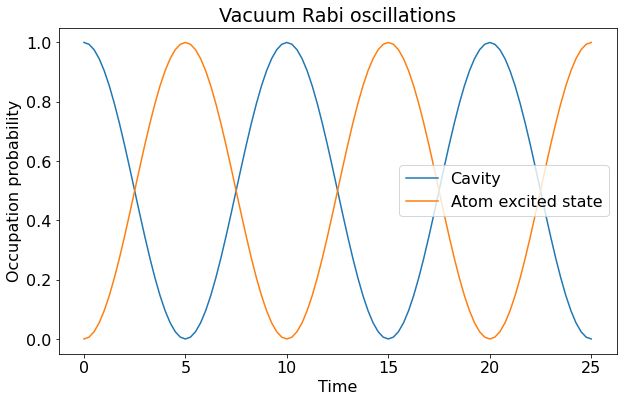

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, A1v, label="Cavity")
axes.plot(tlist, A2v, label="Atom excited state")
axes.legend()
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')